# Image Recognition using Keras

In [1]:
#tutorial https://connectjaya.com/how-to-start-with-deep-learning-using-tensorflow/
#but it wasn't totally correct

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the Fashion MNIST dataset
#it has 60,000 labels of images, with each label being an integer between 0 and 9
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
print(len(train_images))

4423680/4422102 [==============================] - 0s 0us/step
60000


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
len(train_labels)


60000

In [8]:
len(test_labels)

10000

In [9]:
#For this dataset, the pixel values go from 0 to 255
#we need to change that so the values go from 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

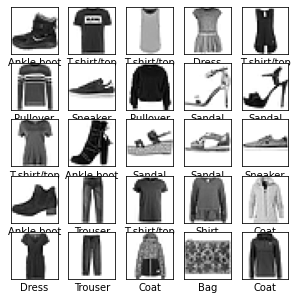

In [10]:
#To see first 25 images in the training set
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the Model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4948 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3741 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3361 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3156 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2961 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2809 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.240

# Test the Model

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3464 - accuracy: 0.8778

Test accuracy: 0.8777999877929688


# Make Predictions

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
#Predict the first image
predictions[0]

array([1.8161546e-07, 7.2761797e-10, 5.2204217e-07, 4.7482049e-09,
       1.0656095e-07, 1.0019068e-02, 2.0146682e-07, 1.4288441e-02,
       1.9497284e-07, 9.7569126e-01], dtype=float32)

In [24]:
np.argmax(predictions[0]) 

9

In [20]:
#Labels and classes
#0 is T-shirt/top
#1 is Trouser
#2 is Pullover
#3 is Dress
#4 is Coat
#5 is Sandal
#6 is Shirt
#7 is Sneaker
#8 is Bag
#9 is Ankle Boot

#so with the first image, it is a 9 or Ankle Boot

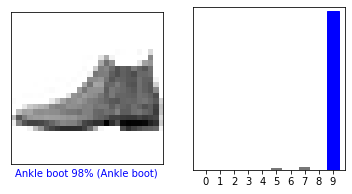

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [26]:
#predict the 10th image
predictions[9]

array([8.1569335e-10, 1.8053750e-09, 1.7959531e-10, 6.2345369e-09,
       8.8134250e-10, 6.2783023e-05, 7.2476483e-11, 9.9990869e-01,
       1.4481066e-07, 2.8334820e-05], dtype=float32)

In [27]:
np.argmax(predictions[9]) 

7

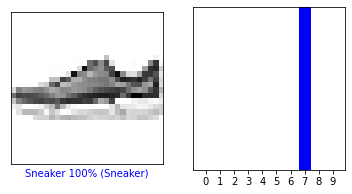

In [28]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

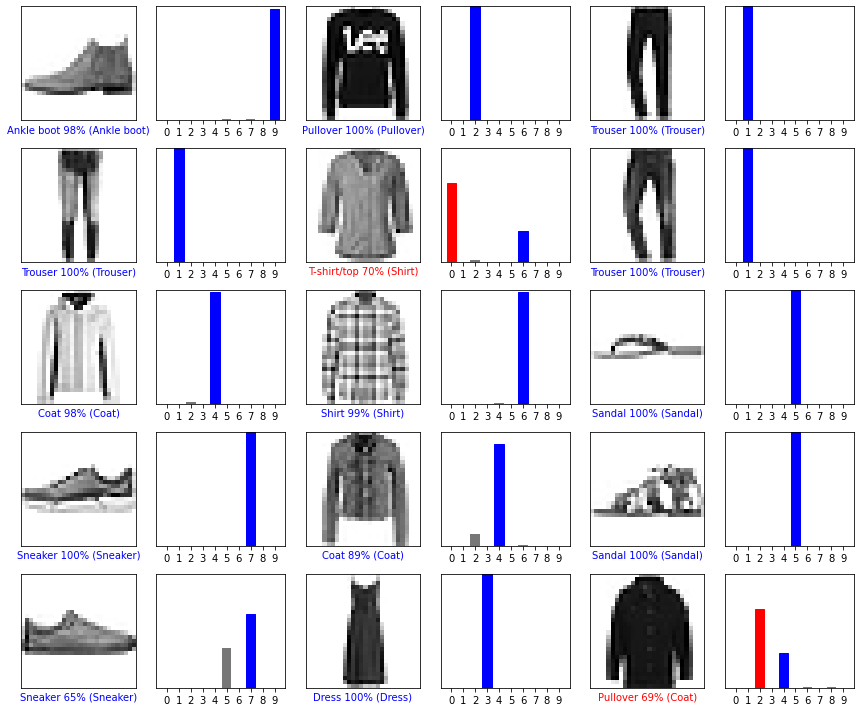

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()